In [38]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

image = np.random.uniform(0,10,10000)
for i,v in enumerate(image):
    roll = np.random.uniform(0,1)
    if (roll > 0.5):
        image[i] = 0
    
image = np.reshape(image, (100,100))
print image

[[ 0.          4.67331576  4.63003366 ...,  9.12232821  0.          1.12008039]
 [ 0.          0.          0.         ...,  0.          0.09886876
   9.85549231]
 [ 0.          0.          0.         ...,  6.37535487  0.          6.85113647]
 ..., 
 [ 1.84931733  5.23457533  0.         ...,  0.          0.          0.        ]
 [ 0.          0.          9.1490678  ...,  0.          0.          6.03578382]
 [ 8.7235765   4.06348372  9.6563919  ...,  4.6990705   1.56722457
   7.46062538]]


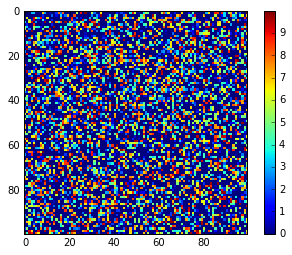

In [39]:
def show_image(image):
    plt.imshow(image, interpolation='nearest')
    plt.colorbar()
    plt.show()
    
show_image(image)

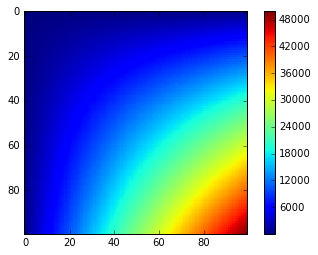

In [30]:
def compute_integral_image(image):
    int_image = image * 0.0;
    for i, rowval in enumerate(image):
        for j, val in enumerate(rowval):
            ## top left case
            if (i==0 and j==0):
                int_image[i,j] = image[i,j]
                continue
            ## top case
            if (i==0):
                int_image[i,j] = image[i,j] + int_image[i,j-1]
                continue
                
            ## left case
            if (j==0):
                int_image[i,j] = image[i,j] + int_image[i-1,j]
                continue
            
            ## normal
            int_image[i,j] = image[i,j] - int_image[i-1,j-1] + int_image[i,j-1] + int_image[i-1,j]
    
    return int_image
            
int_image = compute_integral_image(image)
show_image(int_image)

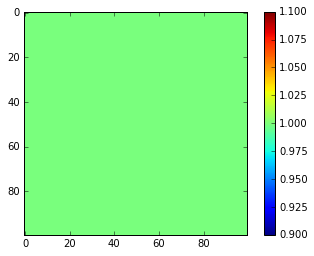

In [31]:
def compute_nonzero_image(image):
    nonzero_image = image * 0.0;
    for i, rowval in enumerate(image):
        for j, val in enumerate(rowval):
            if (val != 0):
                nonzero_image[i,j] = 1
            else:
                nonzero_image[i,j] = 0
    return nonzero_image

nonzero_image = compute_nonzero_image(image)
show_image(nonzero_image)